Feature 분할

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 로드
# train.csv: 첫 번째 열(label), 나머지 784개 열(pixel 값)
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')  # (42000, 785)
X = df_train.iloc[:, 1:].values      # (42000, 784) 이미지 픽셀 데이터
Y = df_train.iloc[:, 0].values      # (42000,) 정답 레이블
# test.csv: 픽셀 데이터만 존재
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')    # (28000, 784)
X_test = df_test.values              # (28000, 784)

# 학습/검증 데이터 분할 (8:2 비율, 클래스 비율 유지)
x_train, x_val, y_train, y_val = train_test_split(
    X, Y,
    test_size=0.2,          # 검증용 데이터 비율 20%
    random_state=42,        # 랜덤 시드 고정으로 재현성 보장
    stratify=Y              # 클래스 비율(y의 분포) 유지
)

1. Image 샘플 시각화

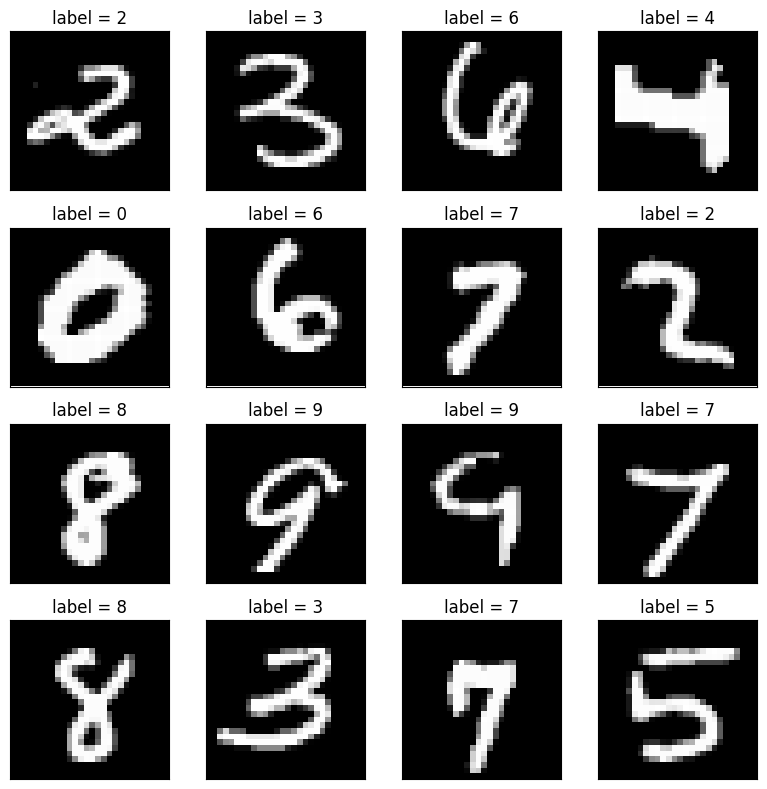

In [5]:
# 1) 학습 데이터 샘플 시각화 (16개, 4×4 그리드)
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        # 학습용 데이터 샘플 픽셀을 28×28로 재구성하여 회색조 이미지로 표시
        ax[i, j].imshow(x_train[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f'label = {y_train[idx]}')
        # x축, y축 눈금 제거
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()  # 서브플롯 간격 자동 조정
plt.show()

2. Scikit-learn 을 이용해서 모델을 학습

In [6]:
# 2) 모델 학습 (Logistic Regression)
clf = LogisticRegression(
    C=1.0,                  # 규제 강도 (작을수록 규제 효과 증가)
    penalty='l2',           # L2 규제 사용
    dual=False,             # 듀얼/프라이멀 공식 선택 (프라이멀 권장)
    fit_intercept=True,     # 절편(intercept) 계산 여부
    intercept_scaling=1,    # liblinear 솔버에서만 사용
    class_weight=None,      # 클래스별 가중치 (None: 동일 가중치)
    random_state=None,      # 내부 난수 시드 (None: OS 기본)
    solver='lbfgs',         # 최적화 알고리즘
    max_iter=100,           # 최대 반복 횟수
    multi_class='multinomial',  # 다중 클래스 분류용 손실 함수
    tol=0.001,              # 수렴 허용 오차
    verbose=0,              # 학습 중 출력 레벨
    warm_start=False,       # 이전 학습 결과 재사용 여부
    n_jobs=None,            # CPU 코어 수
    l1_ratio=None           # Elastic-net 혼합 비율 (사용 안 함)
)
clf.fit(x_train, y_train)  # 모델 학습 수행

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

3. 검증(Validation)데이터(x_val)를 prediction 하고 정확도를 평가

In [7]:
# 3) 검증 데이터 예측 및 정확도 평가
y_val_pred = clf.predict(x_val)             # 검증용 데이터 예측 결과 저장
accuracy = accuracy_score(y_val, y_val_pred) # 실제 레이블과 예측값 비교
print(f"Model accuracy: {accuracy:.3f}")

Model accuracy: 0.911


4. 옳게 분류한 이미지를 아래 format 에 맞게 시각화
변수 : x_val_correct, y_val_correct, y_val_pred_correct

Correctly predicted images:


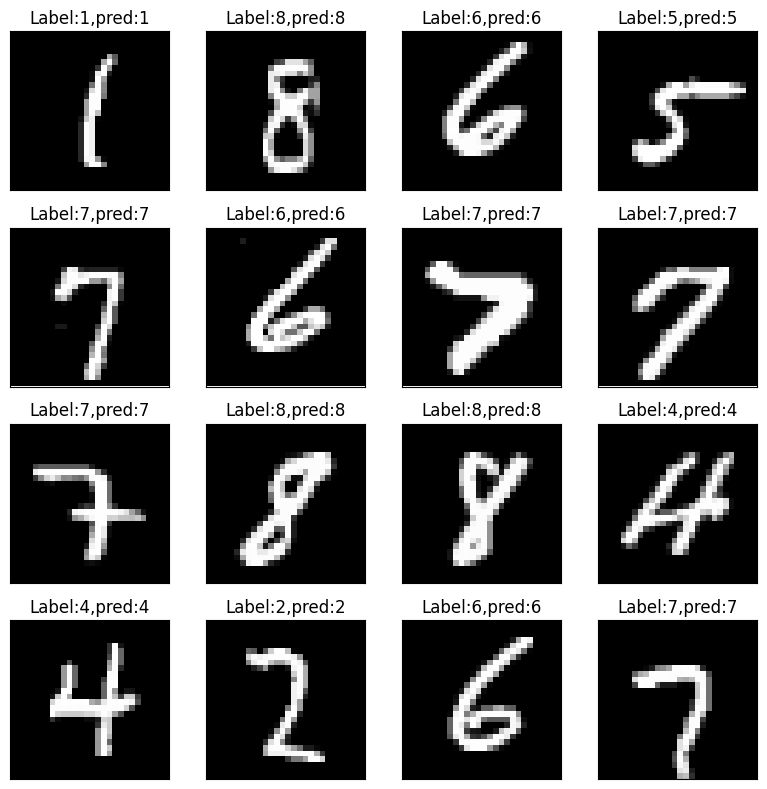

In [8]:
# 4) 옳게 분류된 이미지 시각화 (4×4 그리드)
correct_mask = (y_val_pred == y_val)
x_val_correct = x_val[correct_mask]          # 정답과 일치하는 샘플 추출
y_val_correct = y_val[correct_mask]          # 실제 레이블
y_val_pred_correct = y_val_pred[correct_mask]  # 예측 레이블
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
print("Correctly predicted images:")
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        # 정확히 분류된 샘플을 이미지로 표시
        ax[i, j].imshow(x_val_correct[idx].reshape(28, 28), cmap='gray')
        # 제목에 실제 레이블과 예측 레이블 표시
        ax[i, j].set_title(f"Label:{y_val_correct[idx]},pred:{y_val_pred_correct[idx]}")
        # 눈금 제거
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()  # 간격 조정
plt.show()

5. 잘못 분류한 이미지를 아래 format 에 맞게 시각화

Incorrectly predicted images:


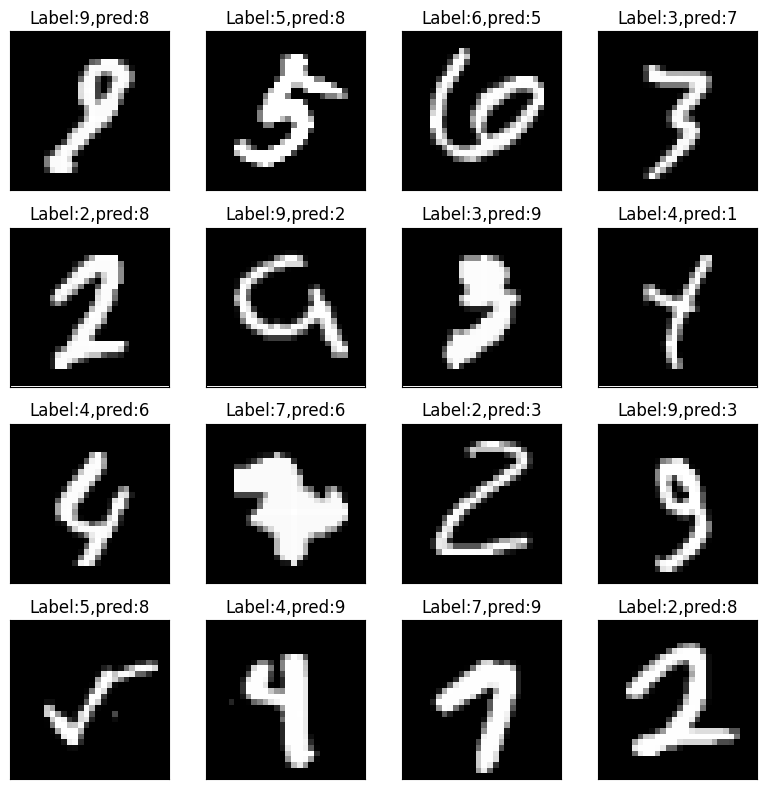

In [9]:
# 5) 잘못 분류된 이미지 시각화 (4×4 그리드)
incorrect_mask = (y_val_pred != y_val)
x_val_incorrect = x_val[incorrect_mask]
y_val_incorrect = y_val[incorrect_mask]
y_val_pred_incorrect = y_val_pred[incorrect_mask]
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
print("Incorrectly predicted images:")
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        # 오분류된 샘플 이미지 표시
        ax[i, j].imshow(x_val_incorrect[idx].reshape(28, 28), cmap='gray')
        # 제목에 실제 레이블과 예측 레이블 표시
        ax[i, j].set_title(f"Label:{y_val_incorrect[idx]},pred:{y_val_pred_incorrect[idx]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()

6. 테스트 데이터(x_test)를 사용해서 예측하기

In [10]:
# 6) 테스트 데이터 예측
# 검증 과정이 끝난 후, 학습된 모델을 이용해 새로운 테스트 데이터에 대한 레이블을 예측합니다.
test_pred = clf.predict(X_test)  # 테스트 데이터 예측 결과 저장

7. 예측값을 파일(sample_submission.csv)로 내보내기

In [11]:
# 7) 결과 파일 생성
# 예측된 결과를 제출 형식에 맞춰 DataFrame으로 만들고 CSV 파일로 저장합니다.
df_submission = pd.DataFrame({
    'ImageId': np.arange(1, len(test_pred) + 1),  # 각 이미지 번호
    'Label': test_pred                            # 예측 레이블
})
df_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv', index=False)
print("sample_submission.csv 생성 완료")


sample_submission.csv 생성 완료
